In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import EDA_functions as func

In [2]:
site = "F"

In [3]:
# load the data
# get parent directory
os.chdir("..")
data_directory = 'Data'

data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

# read the data
data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

# reset to current directory
fd = sys.path[0]
os.chdir(fd)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106805 entries, 0 to 1106804
Data columns (total 27 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Unnamed: 0                     1106805 non-null  int64  
 1   ts                             1106805 non-null  object 
 2   instanceID                     1106805 non-null  object 
 3   AoARel                         1065846 non-null  float64
 4   bladePitch                     1065870 non-null  float64
 5   bladePitchMax                  1066118 non-null  float64
 6   bladePitchMin                  1065870 non-null  float64
 7   bladePitchSetPoint             0 non-null        float64
 8   bladePitchStd                  1084902 non-null  float64
 9   cP                             1065798 non-null  float64
 10  generatorTorque                1065799 non-null  float64
 11  rotorTorque                    1027641 non-null  float64
 12  TI            

In [5]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106805 entries, 0 to 1106804
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1106805 non-null  int64 
 1   ts          1106805 non-null  object
 2   instanceID  1106805 non-null  object
 3   value       1106805 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 33.8+ MB


In [6]:
# print the number of turbines and the turbine IDs
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

21
['F_WTG01' 'F_WTG02' 'F_WTG03' 'F_WTG04' 'F_WTG05' 'F_WTG06' 'F_WTG07'
 'F_WTG08' 'F_WTG09' 'F_WTG10' 'F_WTG14' 'F_WTG15' 'F_WTG16' 'F_WTG17'
 'F_WTG18' 'F_WTG19' 'F_WTG20' 'F_WTG21' 'F_WTG22' 'F_WTG23' 'F_WTG24']


In [7]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [8]:
# Add month, day, and hour
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [9]:
data.columns.values

array(['Unnamed: 0', 'ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [10]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 
                               'TI', 'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [11]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
258497,2020-03-26 11:30:00,3,26,11,F_WTG09,2.113356,0.769695,36.420506,9.988314,0.000000,0
860845,2020-10-11 16:00:00,10,11,16,F_WTG17,6.348087,0.493120,7.768010,9.494176,312.875214,1
731106,2020-08-29 18:20:00,8,29,18,F_WTG16,3.748167,0.638678,17.039743,10.000000,60.486668,1
1087165,2020-12-25 12:10:00,12,25,12,F_WTG20,8.319500,0.817507,9.826396,4.001667,1022.303345,1
840919,2020-10-05 01:50:00,10,5,1,F_WTG20,1.808347,0.313248,17.322340,11.000000,0.000000,0


In [12]:
data.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
count,1.106805e+06,1.106805e+06,1.106805e+06,1.088108e+06,1.088108e+06,1.065846e+06,1.088109e+06,1.088061e+06,1.106805e+06
mean,6.513557e+00,1.575655e+01,1.149978e+01,6.711983e+00,8.964802e-01,1.492019e+01,8.715460e+00,6.212980e+02,6.622711e-01
std,3.451286e+00,8.811684e+00,6.922305e+00,3.880777e+00,4.879825e-01,6.995874e+00,4.290054e+00,7.525006e+02,4.729358e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.753245e+01,-3.611667e+01,0.000000e+00
25%,4.000000e+00,8.000000e+00,5.000000e+00,3.824792e+00,5.388508e-01,1.059810e+01,5.951586e+00,2.478333e+01,0.000000e+00
50%,7.000000e+00,1.600000e+01,1.100000e+01,5.952000e+00,8.272945e-01,1.378465e+01,8.310000e+00,2.584417e+02,1.000000e+00
75%,1.000000e+01,2.300000e+01,1.700000e+01,8.963762e+00,1.169984e+00,1.771074e+01,1.189517e+01,9.975150e+02,1.000000e+00
max,1.200000e+01,3.100000e+01,2.300000e+01,2.756194e+01,6.371584e+00,1.608850e+02,2.711352e+01,2.439857e+03,1.000000e+00


### Plot time series

In [13]:
# select one turbine
data_01 = data[data['instanceID'] == site + '_WTG01']

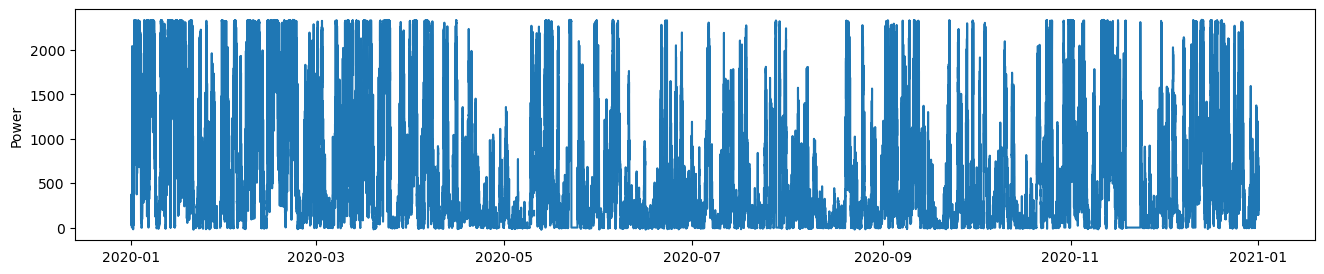

In [14]:
func.plot_timeseries(data_01, 'Power')

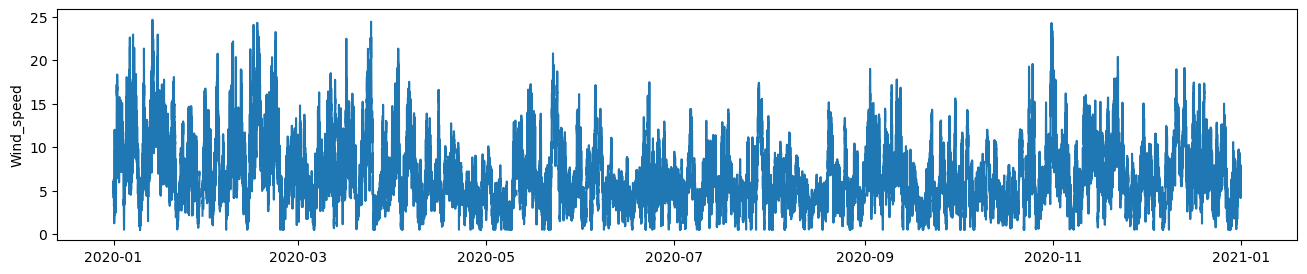

In [15]:
func.plot_timeseries(data_01, 'Wind_speed')

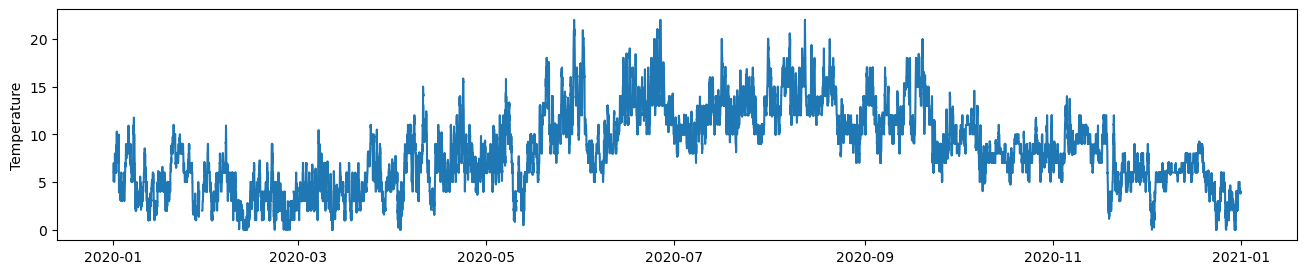

In [16]:
func.plot_timeseries(data_01, 'Temperature')

### Full performance data

In [17]:
# sort the turbine IDs and create a list of the IDs
instanceID = sorted(data.instanceID.unique().tolist())
ID = [instanceID[i][5:] for i in range (len(instanceID))] 

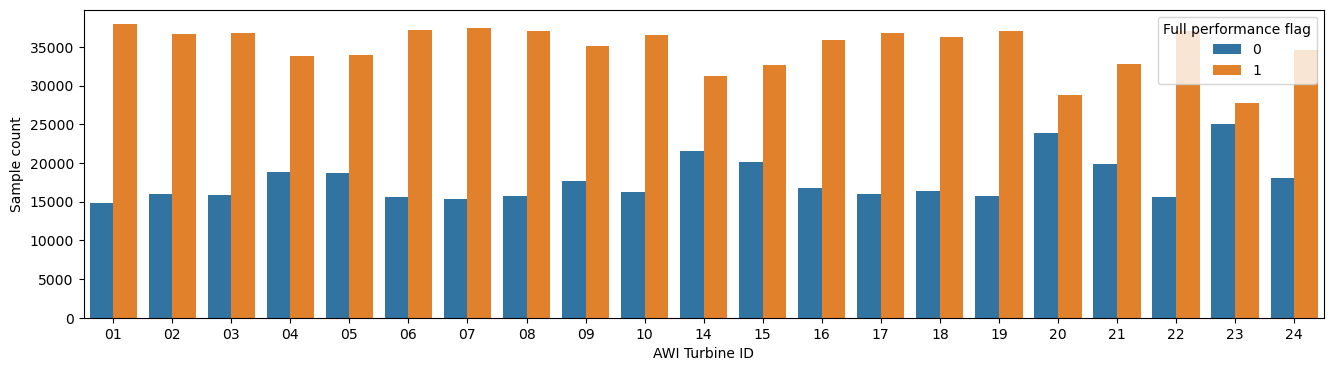

In [18]:
# Plot bar chart of full performance flag vs sample count for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
func.plot_fullperformanceflag(df=bar, order=instanceID, ticklabels=ID, figsize = (16,4), orient = "v")

In [19]:
# only select rows with flag value = 1
data = data[data['value'] == 1]

# drop irrelevant columns 
data = data.drop(columns = ['value', 'Wind_speed_sd'])

In [20]:
data

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
4,2020-01-01,1,1,0,F_WTG05,3.941197,19.936101,7.254701,106.885468
10,2020-01-01,1,1,0,F_WTG14,6.037713,13.224478,6.998294,331.184296
13,2020-01-01,1,1,0,F_WTG17,6.678194,13.777153,7.000000,416.412262
14,2020-01-01,1,1,0,F_WTG18,7.063394,9.655075,7.000000,503.765381
15,2020-01-01,1,1,0,F_WTG19,6.718910,8.100316,6.000000,459.650757
...,...,...,...,...,...,...,...,...,...
1106800,2021-01-01,1,1,0,F_WTG20,5.557047,14.276557,4.000000,254.234894
1106801,2021-01-01,1,1,0,F_WTG21,5.925056,16.988835,4.004515,405.478546
1106802,2021-01-01,1,1,0,F_WTG22,6.454437,14.725406,4.947099,511.448792
1106803,2021-01-01,1,1,0,F_WTG23,5.521681,20.751634,4.000000,364.554626


In [21]:
# remove invalid values and null entries. 
# acceptable TI range: [0, 100]
# acceptable temperature range: [-5, 40]
data_clean = func.clean_data(data)
data_clean

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
4,2020-01-01,1,1,0,F_WTG05,3.941197,19.936101,7.254701,106.885468
10,2020-01-01,1,1,0,F_WTG14,6.037713,13.224478,6.998294,331.184296
13,2020-01-01,1,1,0,F_WTG17,6.678194,13.777153,7.000000,416.412262
14,2020-01-01,1,1,0,F_WTG18,7.063394,9.655075,7.000000,503.765381
15,2020-01-01,1,1,0,F_WTG19,6.718910,8.100316,6.000000,459.650757
...,...,...,...,...,...,...,...,...,...
1106800,2021-01-01,1,1,0,F_WTG20,5.557047,14.276557,4.000000,254.234894
1106801,2021-01-01,1,1,0,F_WTG21,5.925056,16.988835,4.004515,405.478546
1106802,2021-01-01,1,1,0,F_WTG22,6.454437,14.725406,4.947099,511.448792
1106803,2021-01-01,1,1,0,F_WTG23,5.521681,20.751634,4.000000,364.554626


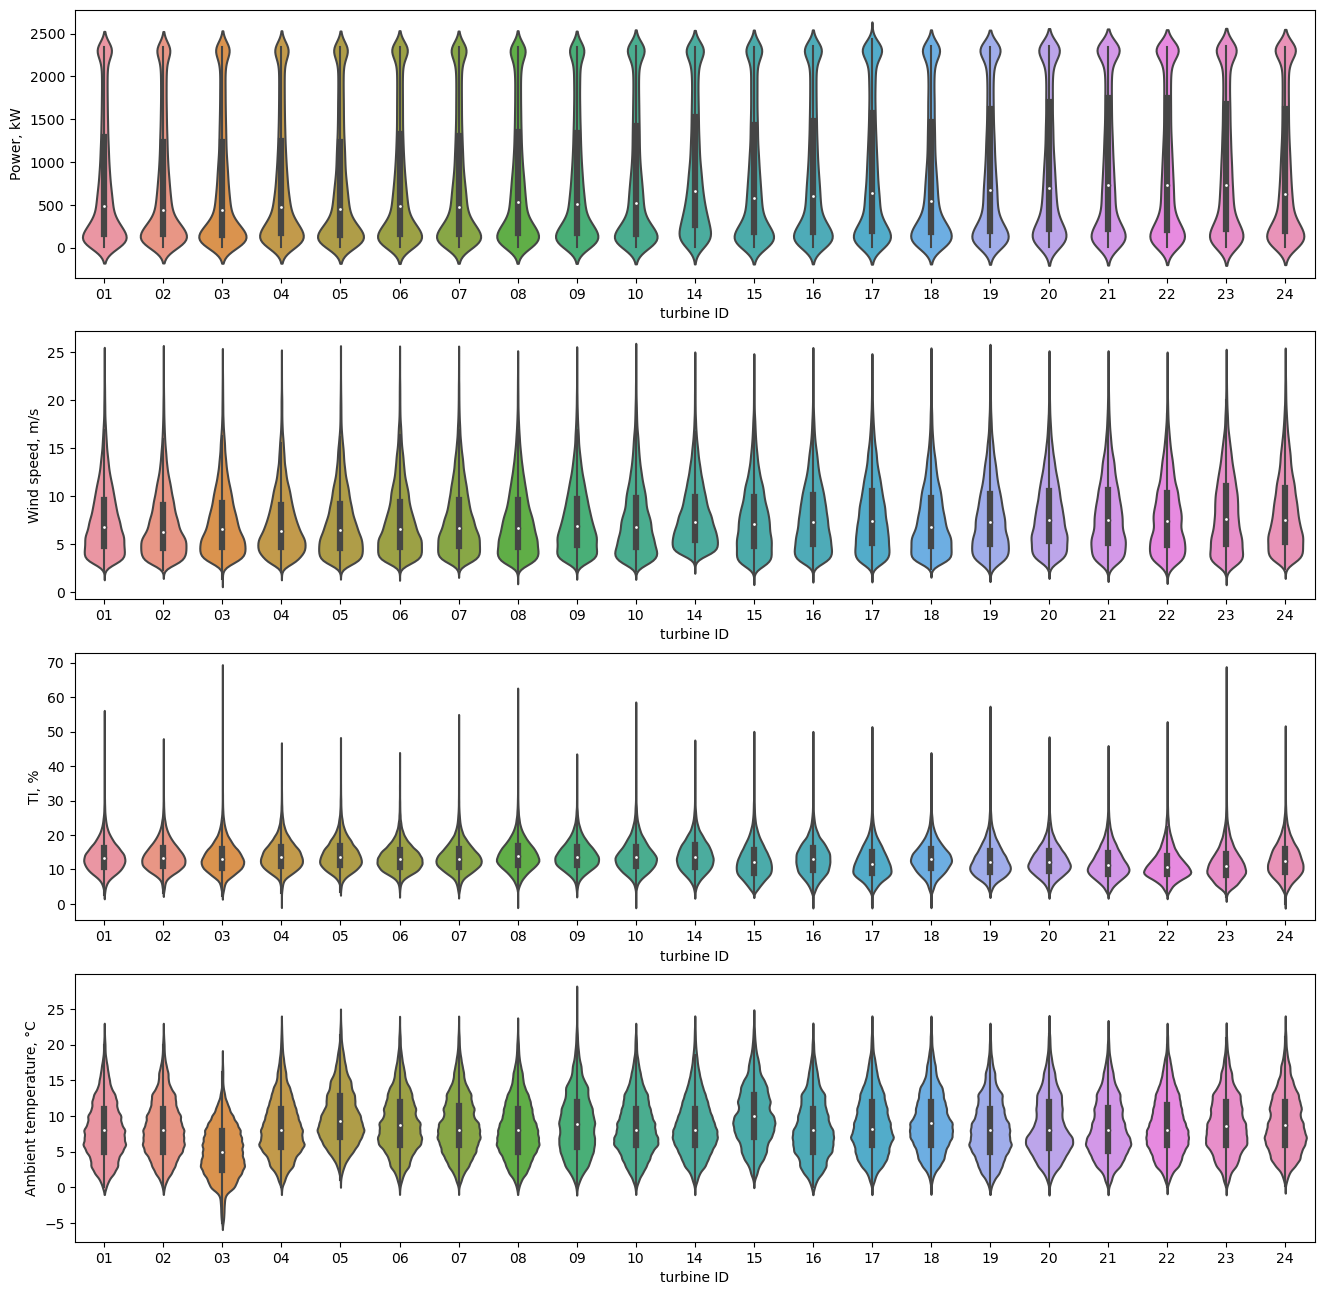

In [22]:
# Make violin plots of the variables 
var = [ 'Power','Wind_speed', 'TI','Temperature']
var_name = [ 'Power, kW','Wind speed, m/s', 'TI, %','Ambient temperature, °C']

func.plot_violinplot(df=data_clean, var=var, var_name=var_name, order=instanceID, 
                ticklabels=ID, figsize=(16, 16), orient = "v")

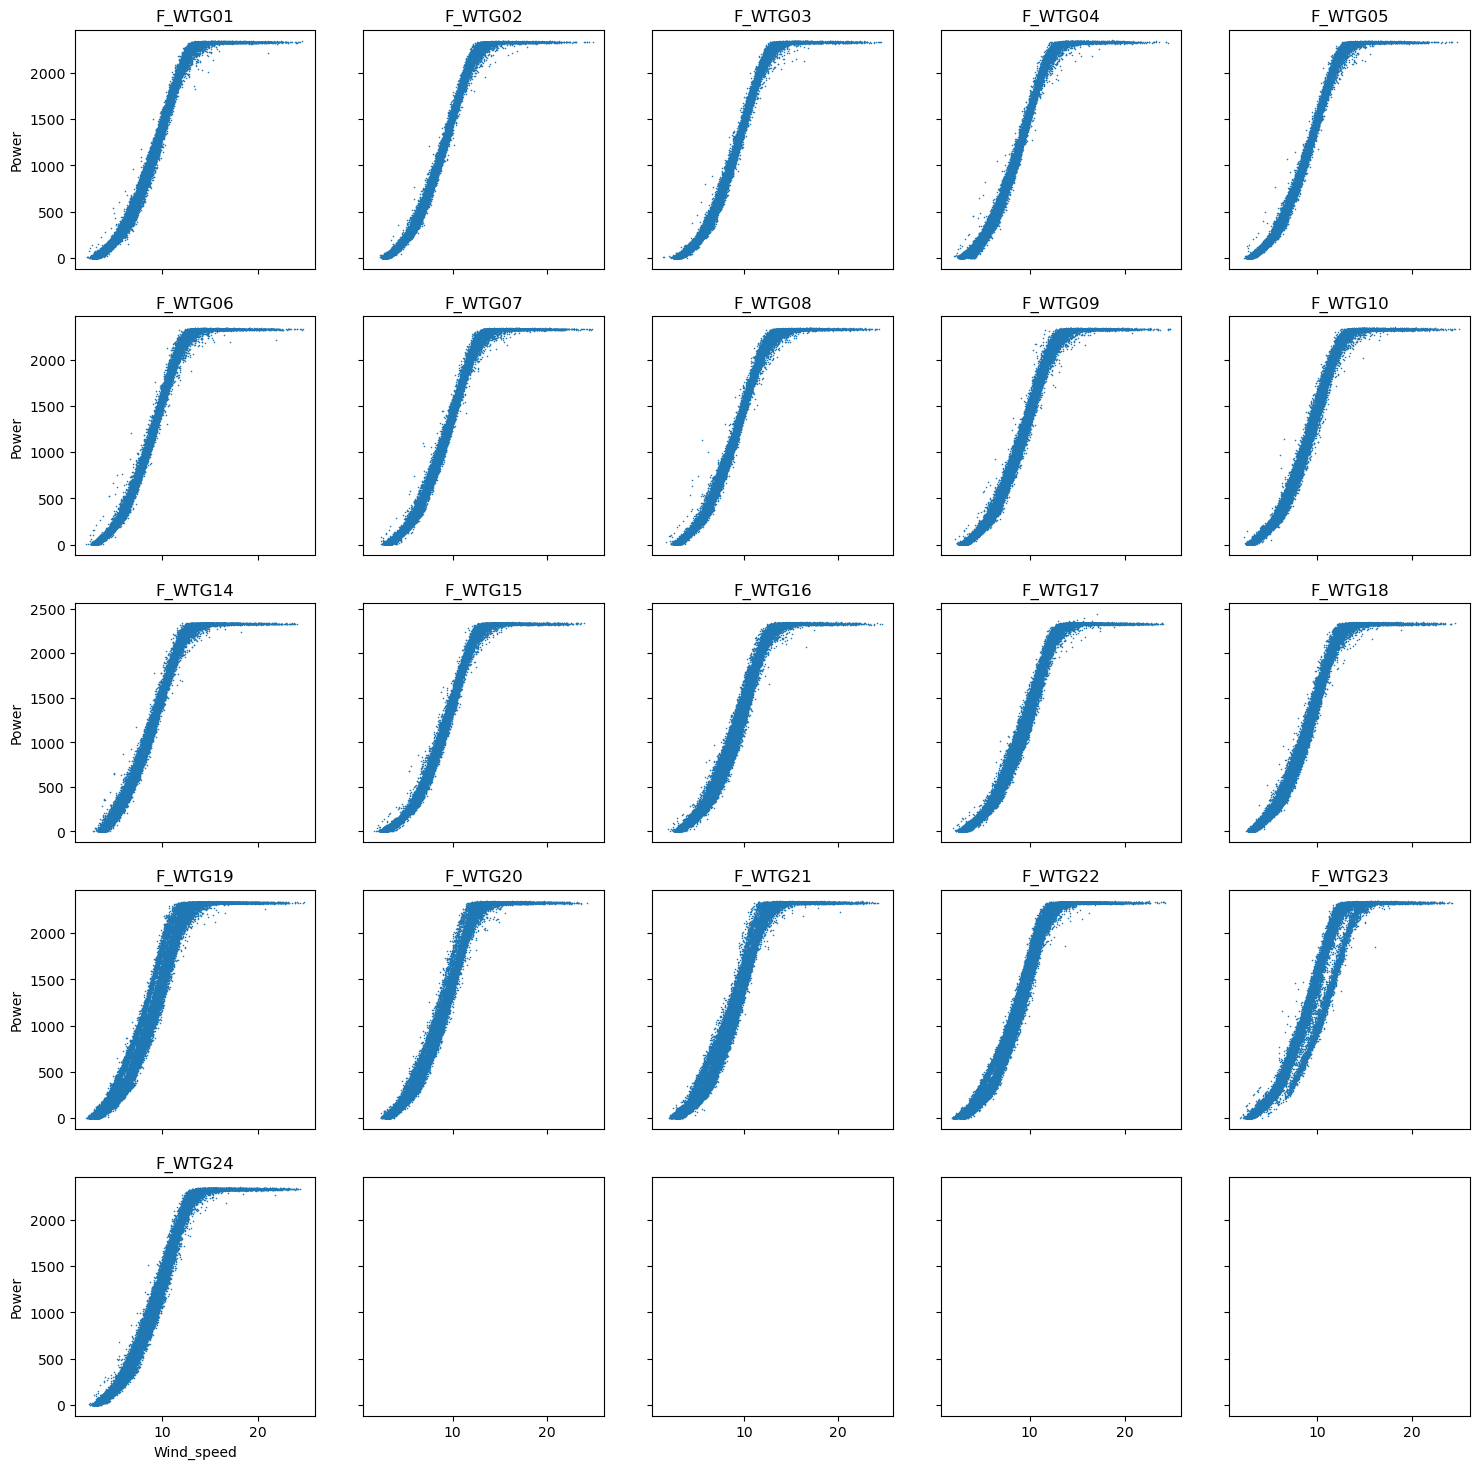

In [23]:
# Plot power curve for each turbine
func.plot_powercurve(df=data_clean, order=instanceID, figsize=(18,18))

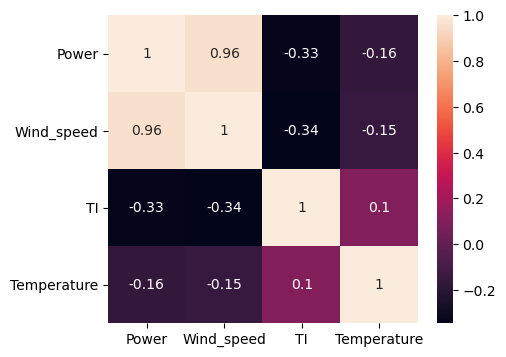

In [24]:
# Plot correlation between variables
plt.figure(figsize = (5,4))
sns.heatmap(data_clean[var].corr(), annot=True)
plt.show()

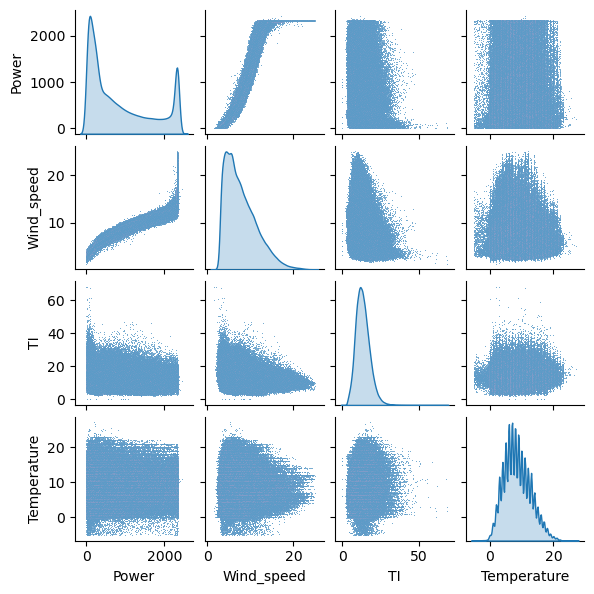

In [25]:
# Make pairplot of the variables
sns.pairplot(data_clean, vars = var, diag_kind = 'kde', plot_kws={'s' : 0.5}, height = 1.5)
plt.show()

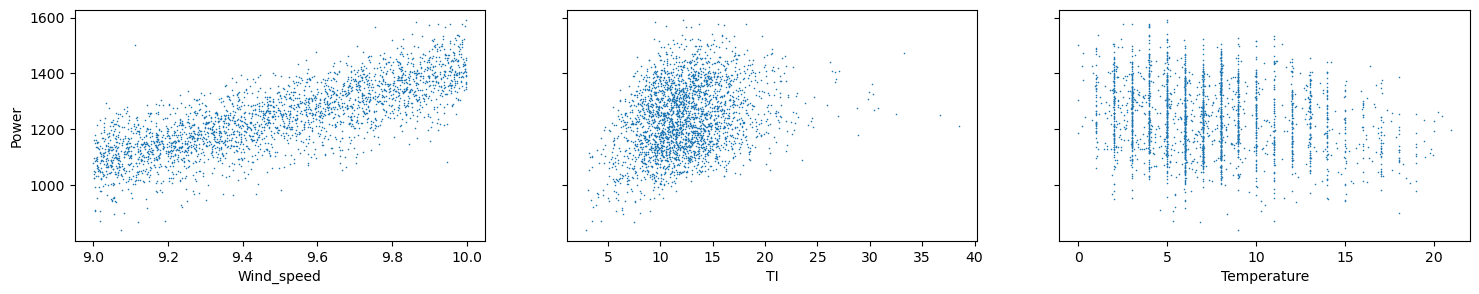

In [26]:
x_var = ["Wind_speed", "TI", "Temperature"]
func.plot_vars(df=data_clean, turbine_name= site + "_WTG01", ws_range=(9,10), x_var = x_var, figsize=(18,3))

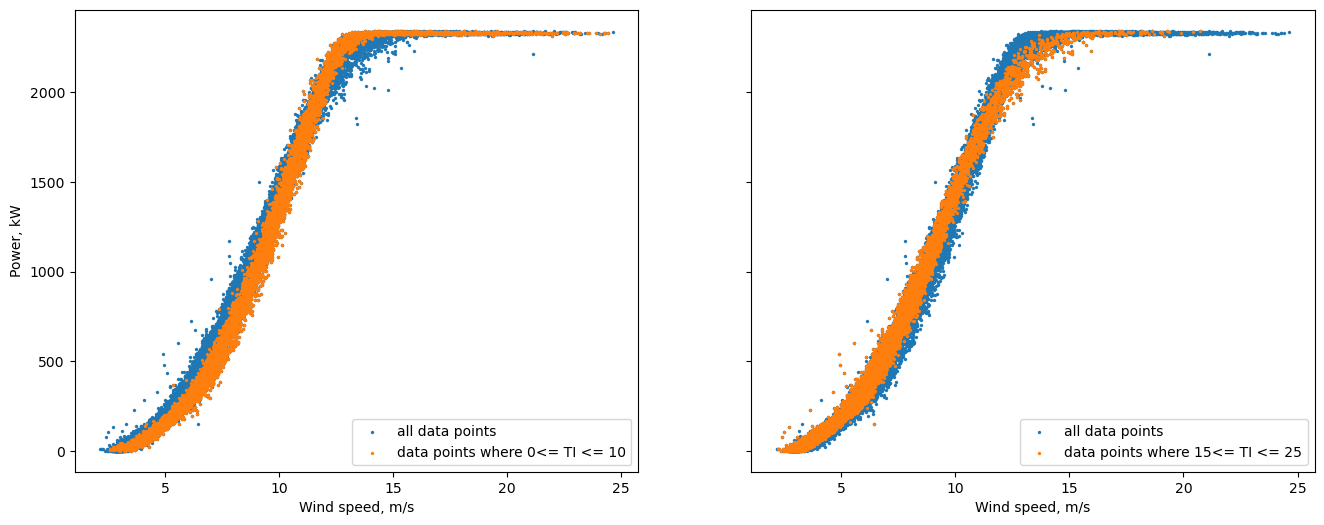

In [27]:
func.plot_TIeffect(df=data_clean, turbine_name= site + "_WTG01", ws_range1 = (0,10), ws_range2 = (15,25), figsize=(16,6))

### fit and save Standardscaler

In [28]:
from sklearn.preprocessing import StandardScaler
import pickle

In [29]:
# fit standardscaler and save it for later use (remove the mean and scale to unit variance)
scalerX = StandardScaler()
scalerX.fit(data_clean.iloc[:, 5:-1])
scalerY = StandardScaler()
scalerY.fit(data_clean.iloc[:, -1:])

StandardScaler()

In [30]:
# get parent directory
os.chdir("..")
directory = 'Data_clean'
scaler_nameX = site + "_scalerX.pkl"
scaler_nameY = site + "_scalerY.pkl"

# save 
pickle.dump(scalerX, open(os.path.join(os.getcwd(), directory, scaler_nameX),'wb'))
pickle.dump(scalerY, open(os.path.join(os.getcwd(), directory, scaler_nameY),'wb'))


### Sample data

In [31]:
# define sample size for pretraining (for a wind farm) 
# These pretraining samples are only used for neural networks. 
pretrain_size = 200000

# sample the data.
data_pretrain = data_clean.sample(pretrain_size, random_state = 64)

data_pretrain

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
641560,2020-07-31 03:40:00,7,31,3,F_WTG14,11.562270,15.563968,14.475793,2065.654541
405158,2020-05-13 23:30:00,5,13,23,F_WTG06,8.932220,10.843429,5.998331,1142.030029
789570,2020-09-18 02:20:00,9,18,2,F_WTG16,3.512646,14.792866,16.000000,49.524124
559332,2020-07-03 23:00:00,7,3,23,F_WTG22,5.114642,5.962001,12.000000,192.063232
258980,2020-03-26 15:20:00,3,26,15,F_WTG09,3.544667,11.069558,8.558333,39.351665
...,...,...,...,...,...,...,...,...,...
70498,2020-01-24 07:30:00,1,24,7,F_WTG02,3.146000,18.163573,5.000000,32.246666
1010429,2020-11-30 03:10:00,11,30,3,F_WTG18,9.191319,7.529289,8.691152,1215.530884
661497,2020-08-06 17:50:00,8,6,17,F_WTG22,9.043667,22.623356,18.000000,1202.913330
964473,2020-11-14 22:30:00,11,14,22,F_WTG07,8.955833,19.167485,9.948333,1108.386719


In [32]:
# define sample size for training (for each turbine)
# For neural networks, these training samples are used for fine tuning. 
train_size = 10000

# sample the data. select equal number of training samples from each turbine. 
data_train = data_clean.groupby('instanceID', group_keys=False).apply(lambda x: x.sample(train_size, random_state = 22))

data_train

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
133497,2020-02-14 03:30:00,2,14,3,F_WTG01,4.719199,16.982330,1.000000,212.400665
867594,2020-10-13 21:40:00,10,13,21,F_WTG01,4.322167,17.554597,8.000000,98.794998
482664,2020-06-08 14:40:00,6,8,14,F_WTG01,3.904735,15.896161,10.000000,71.674240
242214,2020-03-21 02:20:00,3,21,2,F_WTG01,5.553833,11.297333,2.978333,256.829987
412776,2020-05-16 12:00:00,5,16,12,F_WTG01,11.310536,18.692481,8.000000,1797.350586
...,...,...,...,...,...,...,...,...,...
757427,2020-09-07 11:10:00,9,7,11,F_WTG24,13.847255,14.006639,16.000000,2206.832031
399965,2020-05-12 06:10:00,5,12,6,F_WTG24,6.968447,10.035220,5.000000,487.282135
668786,2020-08-09 03:40:00,8,9,3,F_WTG24,4.444426,10.095162,13.000000,100.918472
439739,2020-05-25 09:50:00,5,25,9,F_WTG24,10.925876,10.335528,14.073456,1627.290527


### Export data

In [33]:
file_name_clean = site + "_data_clean.csv"
file_name_pretrain = site + "_data_pretrain.csv"
file_name_train = site + "_data_train.csv"

# save 
data_clean.to_csv(os.path.join(os.getcwd(), directory, file_name_clean))
data_pretrain.to_csv(os.path.join(os.getcwd(), directory, file_name_pretrain))
data_train.to_csv(os.path.join(os.getcwd(), directory, file_name_train))

# reset to current directory
fd = sys.path[0]
os.chdir(fd)